이 notebook의 원본 링크:  
+ [EDA To Prediction](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

# EDA To Prediction (DieTanic)

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem.** How do we check features, how do we add new features and some Machine Learning Concepts.

-> 이 notebook의 목적은 **예측 분석 모델링 작업이 어떻게 이루어지는지, 그 기초를 다지기 위함**에 있습니다. 어떻게 feature를 확인하고, 어떻게 새로운 feature를 추가하고, 어떻게 머신 러닝의 생각들을 접목시키는지 그 기본적인 것에 대하여 다룹니다.

## Part1: Exploratory Data Analysis(EDA)

먼저 필요한 라이브러리들을 import하고 주어진 데이터를 확인해봅시다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# 훈련 데이터 불러오기
data = pd.read_csv('./input/train.csv')

In [7]:
# 훈련 데이터 한번 훑어보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 데이터 내에 있는 전체 null value 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 있는 null value에 대한 처리 필요

### How many survived?

먼저 우리의 target label인 **Survived**를 확인해보자. 얼마나 생존하였는가?

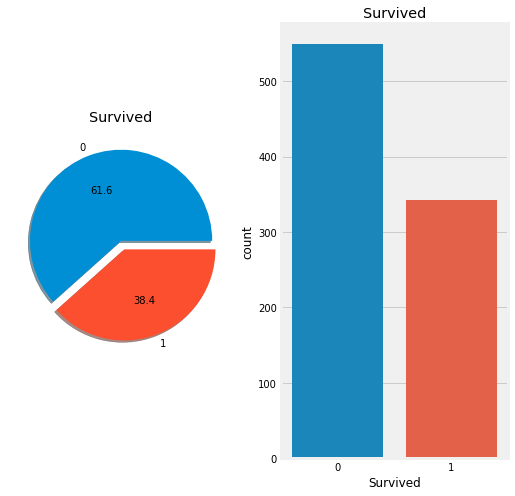

In [11]:
# survived에 대한 두 가지 그래프를 그릴 도화지 준비
f, ax = plt.subplots(1, 2, figsize=(8, 8))

# 하나는 파이 그래프로
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 하나는 막대 그래프로
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

많은 사람들이 생존하지 못한 것은 너무나 자명하다.

We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

-> 우리는 이 데이터에 대한 **insight**를 얻기 위하여 조금 더 깊게 분석을 해보아야 한다. 그리고 어떤 부류의 사람들이 생존하였고, 그렇지 못하였는지 확인을 해야 한다. 데이터에 있는 다른 여러 feature들과 생존률 사이의 관계를 확인하며 **insight**를 얻어보자.

First let us understand the different types of features.

먼저 feature들의 **type**를 파악하자

## Types Of Feature

### Categorical Features:

has two or more categories and each value in that feature can be categorised by them. also known as **Nominal Variables.**

둘 이상의 범주가 존재하고 그 범주에 따라 값들이 분류되어 있는 feature들. 명목변수(nominal Variable)이라고도 불림. 측정 대상의 특성을 분류하기 위한 변수로, 숫자는 오로지 **구분만을 위해 사용되며, 숫자 자체에 크기나 의미는 없다.**

**Categorical Features in the dataset: Sex, Embarked.**


### Ordinal Features:

similar to categorical values, but it has relative ordering or sorting btw the values.

명목 변수와 유사하지만, **측정 대상간에 서열을 부여하여 크고 작음, 높고 낮음, 순위를 파악하는 변수**이다. 즉, categorical feature과는 다르게 **부여되는 숫자에 의미가 존재**. 서열 변수라고 불림.

**Ordinal Features in the dataset: Pclass*


### Continuous Feature:

A feature is said to be continuous if it can take values btw any two points or btw the minimum or maximum in the features column.

어느 두 값 사이의 값들을 갖는다거나 해당 feature의 최대 최솟값 사이의 값을 가지면 그 feature를 continuous 하다고 말한다.

**Continuous Features in the dataset: Age**

## Analysing The Features

### Sex -> Categorical Feature

In [12]:
# 각 성별마다 생존한 사람과 그렇지 못한 사람 확인
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


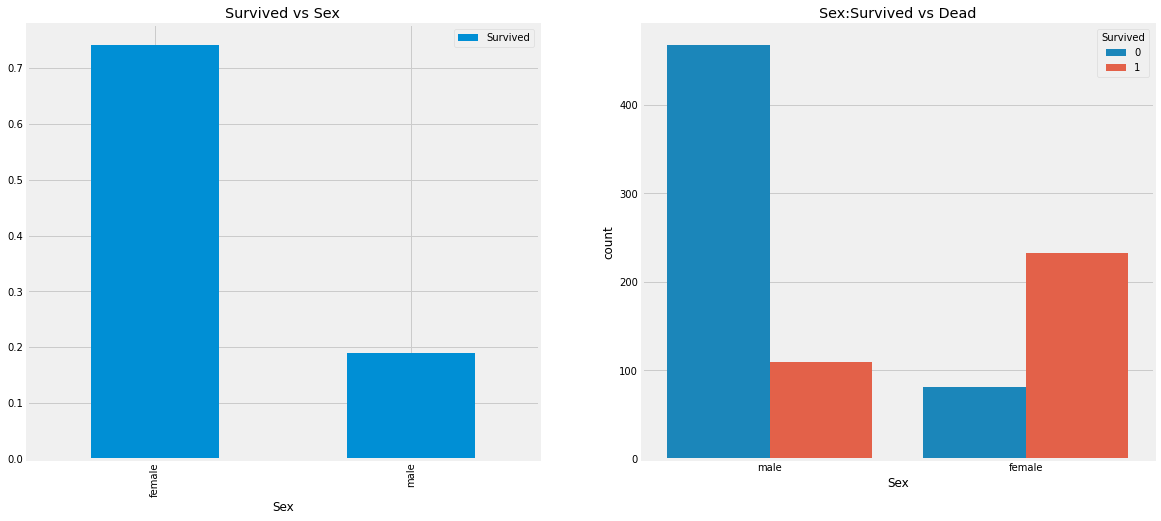

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

탑승한 승객은 남자가 더 많지만 **생존한 사람들은 여자가 더 많음.**
여자의 생존률은 70%가 넘어가는데 남자의 생존률은 20%를 넘지 못함.

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

매우 중요한 feature로 보이지만 일단 다른 feature들도 확인해보자.

## Pclass -> Ordinal Feature

In [21]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


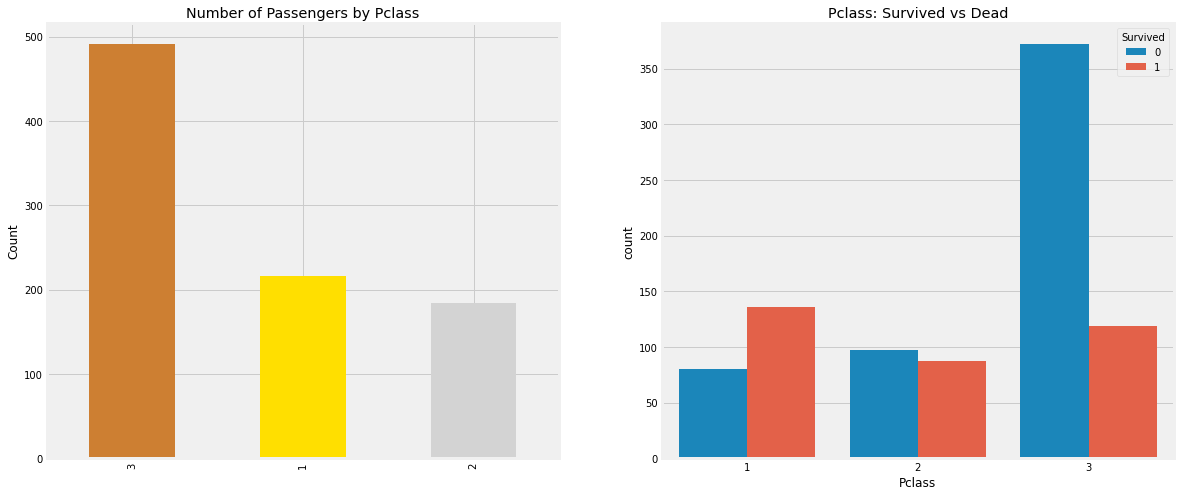

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 탑승 승객을 Pclass에 따라 분류
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

# 각 Pclass 내에서 생존한 사람들과 그렇지 못한 사람들의 수를 막대 그래프로 표현
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue.

사람들은 돈으로 모든 것을 살 수 없다고 얘기하지만 위의 그래프를 보면 **비싼 좌석에 앉았을수록 생존률이 높다.** Pclass=3 에 앉은 사람들이 가장 많지만, 생존률은 다른 Pclass에 비해 현격하게 낮다.

Lets DIve in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

조금 더 들어가보죠. 이전에 분석한 Sex feature과 Pclass를 합쳐서 살펴보겠습니다. 

In [25]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

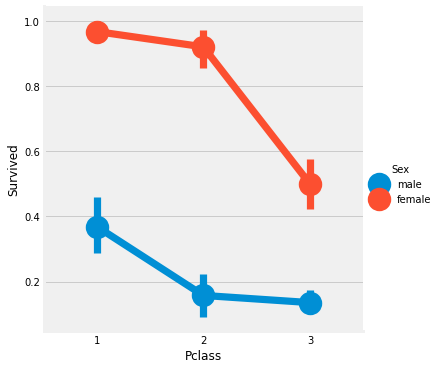

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **Factorplot** in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and Factorplot, we can easily infer that survival for **Women from Pclass1** is about 95~96%

It is evident that irrespective of Pclass, **Women were fiven first priority while rescue.**

Factorplot이 categorical value를 쉽게 분리하여 그래프로 나타내줌.

두 그래프를 보면 **Pclass1에 있던 여성들은 대부분이 생존하였다.** 그리고 모든 Pclass에서 여성의 생존률이 남성의 생존률보다 높다. 

**Pclass와 무관하게 구출 과정에서 여성은 1순위였었다는 것을 쉽게 유추할 수 있음.**

## Age -> Continuous Feature

In [30]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


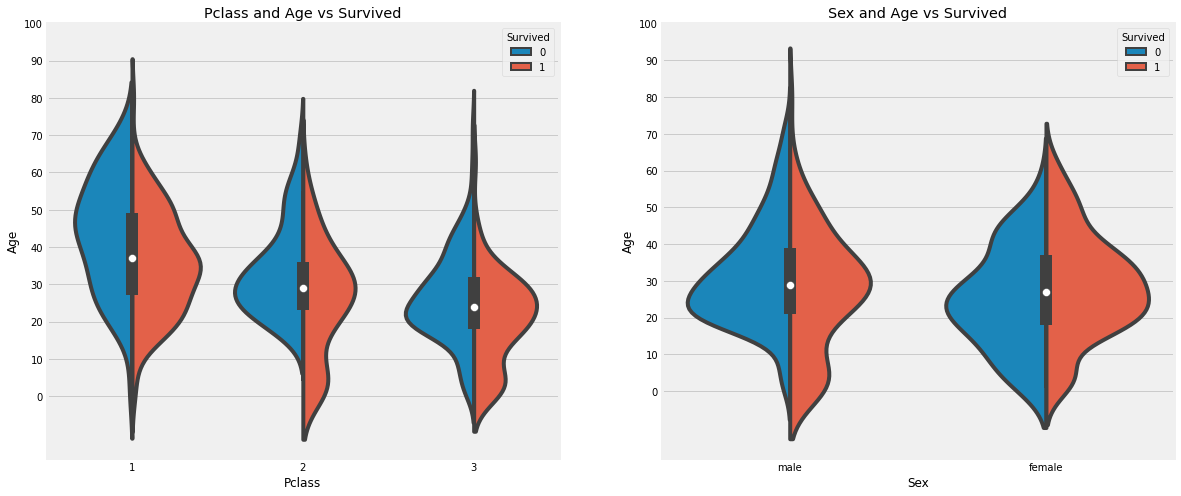

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Observations:

1) The number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.

Pclass가 낮아질수록 아이들이 많음. 10세 이하 아이들의 생존률은 Pclass와 무관하게 높음.

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

Pclass1에 탑승한 20-50세의 생존 가능성이 높으며 여성이 더 높음

3) For males, the survival chances decreases with an increase in age.

남성은 나이가 들수록 생존 가능성이 적어짐

앞에서 살펴봤듯이 Age feature에는 상당수의 **NULL값** 존재. 이를 채우는 가장 무난한 방법은 age feature의 평균값으로 채우는 것이다. 하지만 예를 들어 나이가 너무 어린 아이들의 나이를 평균값으로 채워버리면 이는 상식적으로 부정확한 방법이다. 그러면 **다른 feature들 중에서 나이를 예측할 수 있는 feature가 있을까?** 

=> 이름에 있는 Mr, Mrs 등으로 대강의 예측이 가능하다1

Thus we can assign the **mean values of Mr and Mrs to the respective groups!**

In [36]:
# 이름에서 호칭을 추출할 새로운 feature 생성
data['Initial'] = 0
for i in data:
    # 정규 표현식을 이용하여 호칭 추출
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


잘못 작성된 호칭들도 있고, 많이 등장하지 않는 호칭들도 있다. 가장 대표적인 호칭들로 묶거나 애매한 호칭들은 아예 따로 묶어놓자. 그리고 **각 그룹의 나이의 평균값**으로 각 그룹에 존재하는 NULL값을 채우자.

In [38]:
# 호칭들 정리
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [40]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [41]:
# 각 그룹의 평균값으로 NULL 값 채우기
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [44]:
# Age에 NULL값이 존재하는지 확인
data.Age.isnull().any()

False

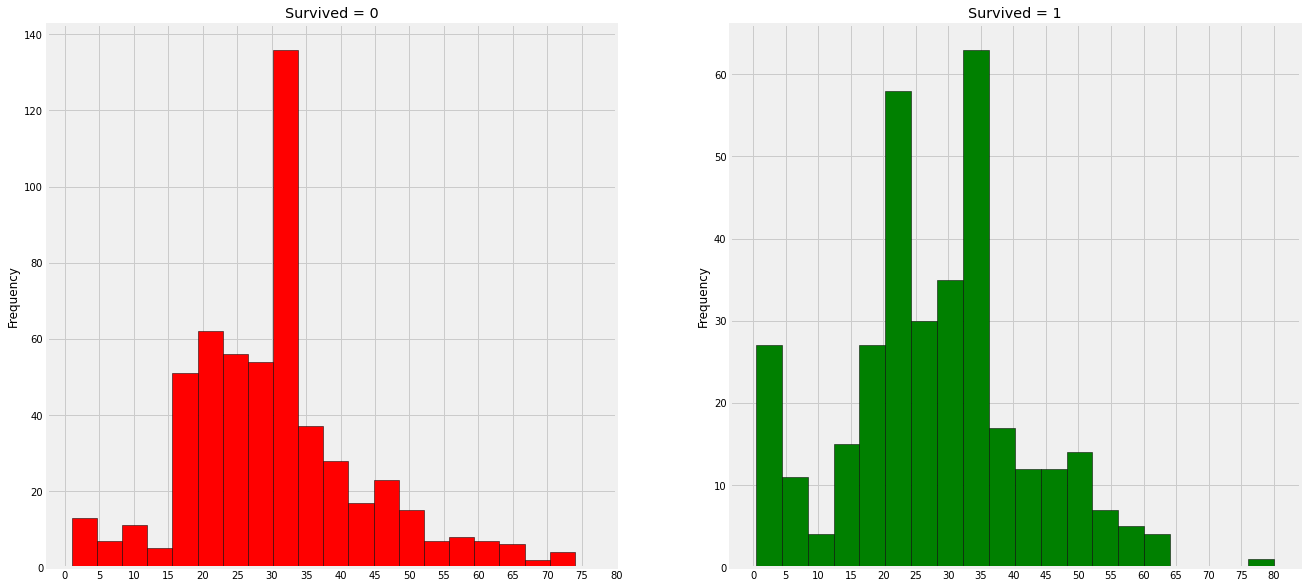

In [46]:
# 연령대별로 생존한 사람들의 수를 나타내는 막대 그래프를 그림
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 생존하지 못한 사람들의 막대 그래프
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# 생존한 사람들의 막대 그래프
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()  

Observatios:

1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

아이들은 많이 생존 (여성과 아이들을 먼저 구출한다), 20대도 많이 생존

2) The oldest Passenger was saved.

가장 나이가 많으신 분도 생존

3) Maximum number of deaths were in the age group of 30-40.

30-40대가 많이 사망,

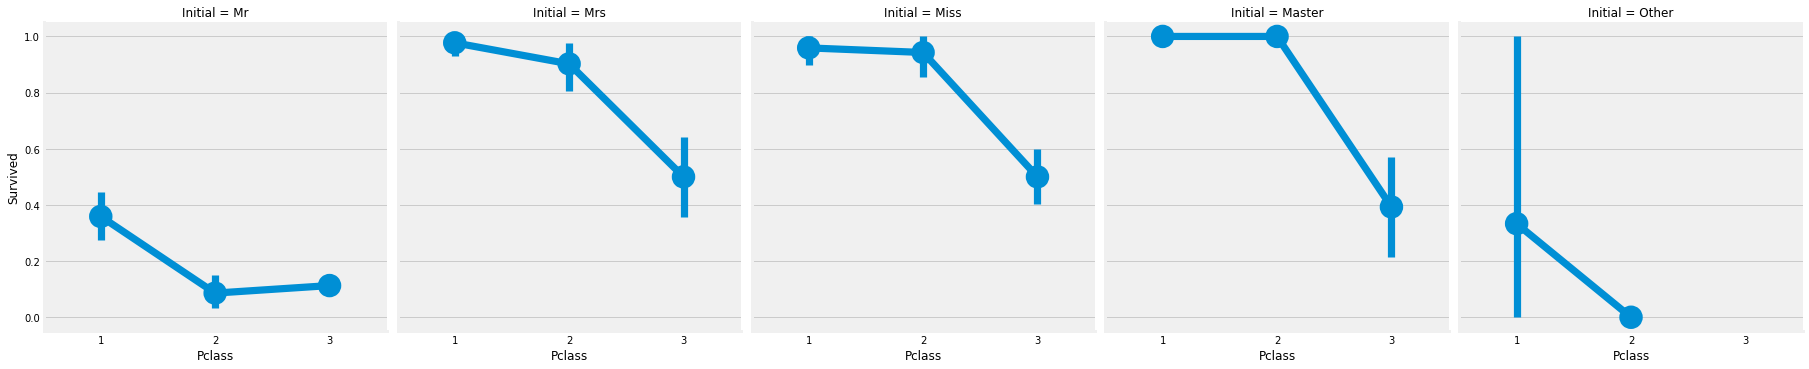

In [49]:
# 호칭과 Pclass에 따른 생존률을 그래프로 그림
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

# 확실히 여성이 많이 생존

## Embarked -> Categorical Value

In [50]:
# 출항한 항구와 Pclass에 따른 생존률을 남성과 여성으로 구분하여 표로 도식화
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

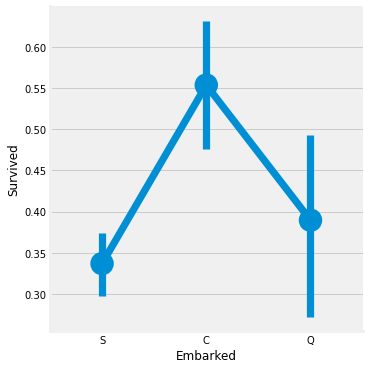

In [52]:
# 출항한 항구에 따른 생존률을 factorplot으로 표현
sns.factorplot('Embarked', 'Survived',data=data)
plt.show()

# C에서 탑승한 승객들의 생존률이 가장 높음

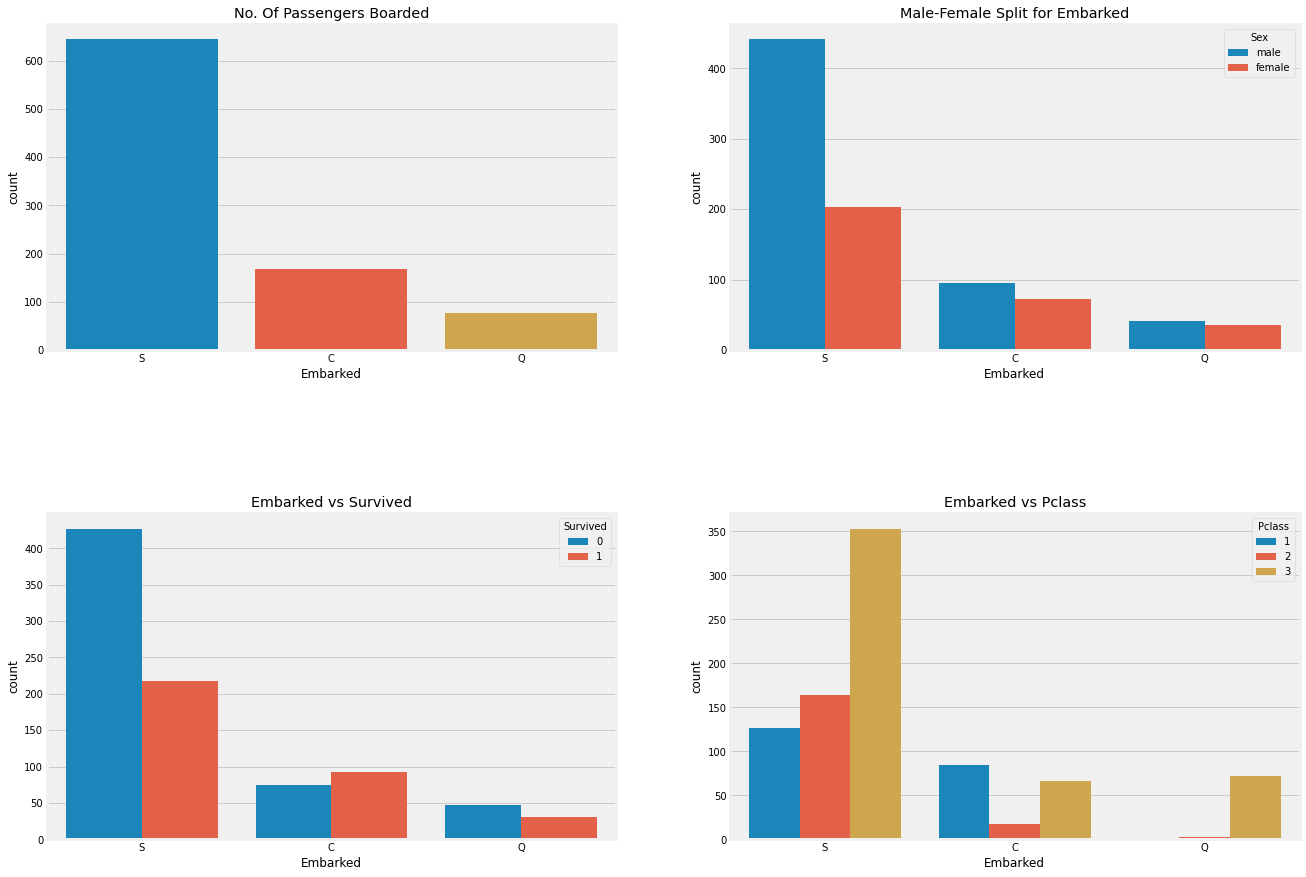

In [57]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 각 항구에서 탑승한 승객들의 수를 막대 그래프로 표현
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

# 각 항구에서 탑승한 승객들의 수를 성별을 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# 각 항구에서 탑승한 승객들의 수를 생존 여부에 따라 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# 각 항구에서 탑승한 승객들의 수를 Pclass로 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

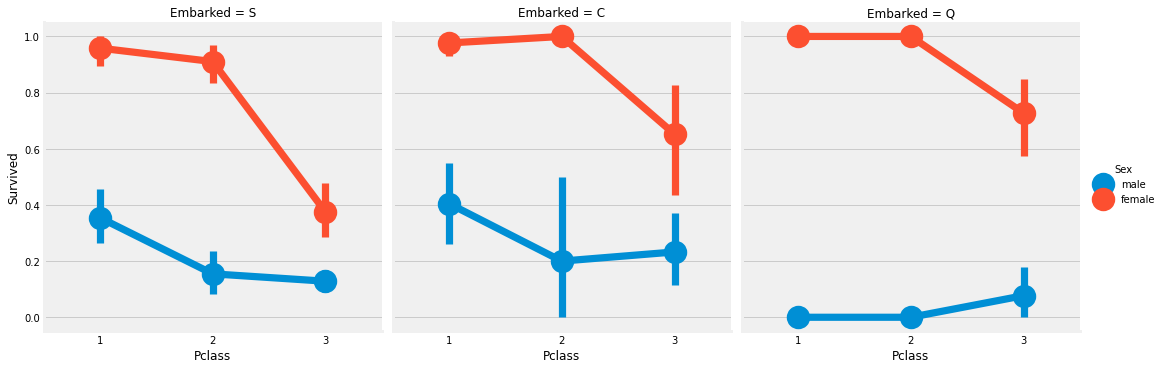

In [56]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

Observations:

1) S에서 가장 많이 탑승하였고, 대부분의 사람들은 Pclass3

2) C에서 탑승한 사람들 중 절반 이상의 사람들이 생존 -> 아마 Pclass1과 Pclass2의 사람들의 생존으로 인한 결과이지 않을까 싶음

3) S에서 Pclass1과 Pclass3 사람들이 가장 많이 탑승. 돈이 많으신 분들이 많이 탑승한 항구. 그럼에도 생존률은 그리 좋지 못함. -> Pclass3의 대부분의 사람들이 생존하지 못함

4) Q에서 탑승한 대부분의 사람들은 Pclass3

5) Pclass에 관계 없이 여성의 생존 가능성은 1에 가까움

6) S에서 탑승한 사람들중 Pclass3의 사람들은 대부분 생존하지 못함 **(Money matters)**

7) Q에서 탑승한 사람들중 남성은 거의 생존하지 못함. unluckiest

### Filling Embarked NaN

missing value가 2개 밖에 없으므로 가장 빈도 수가 높은 값인 S로 채움

In [59]:
data['Embarked'].fillna('S', inplace=True)

In [60]:
data.Embarked.isnull().any()

False

## SibSp -> Discrete Feature

This feature represents whether a person is alone or with his family members

In [61]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

# 혼자 혹은 2명이서 탄 사람이 가장 많음

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


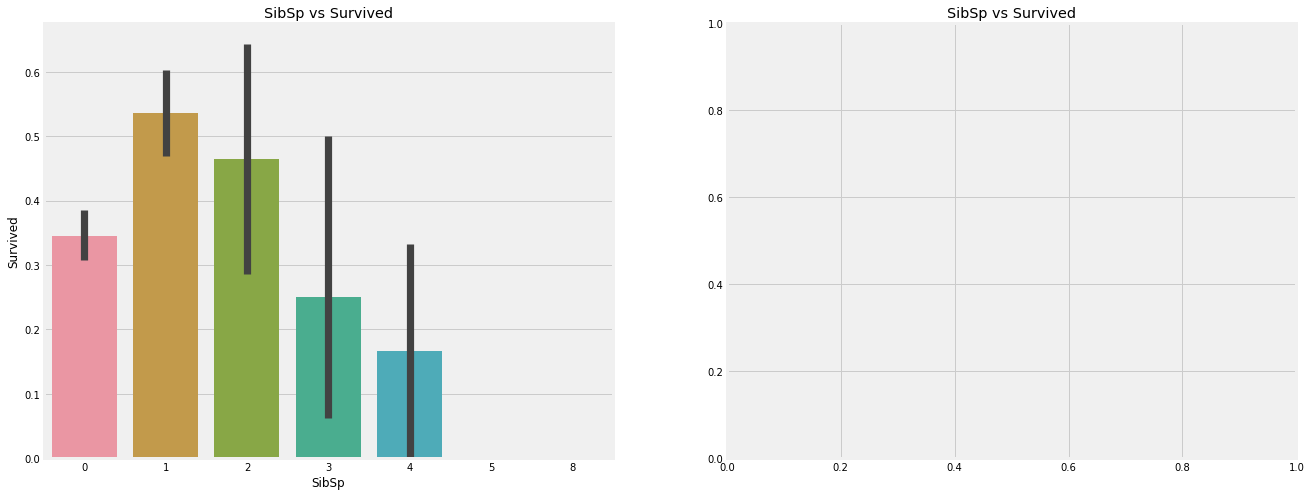

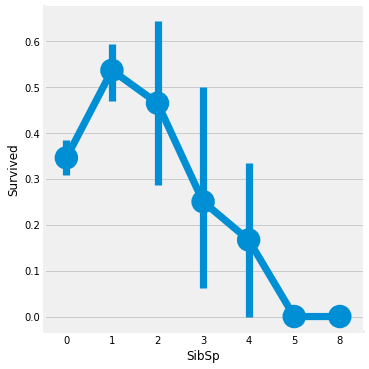

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close(2)
plt.show()

In [92]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:

형제자매 없이 탑승한 사람들의 생존률은 약 30% 정도이고, 형제자매의 수가 늘을 수록 생존률이 감소하는 형태를 보인다. 어찌보면 당연한 이야기이다. 자신의 가족들을 두고 혼자 탈출할 수는 없지 않은가. 

심지어 5~8명의 형제자매가 있는 경우에는 모두 사망하였다. 이는 **모두가 Pclass3에 탑승하였기 때문에** 사망한 것으로 보인다. 

It is imminent that all the large families in Pclass3(>3) died.

## Parch

In [94]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


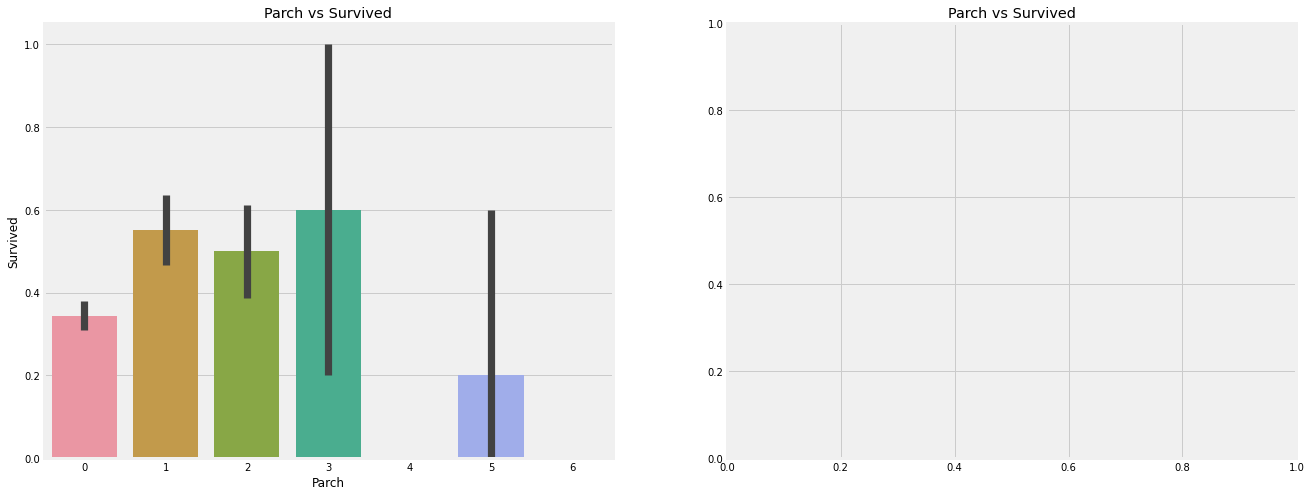

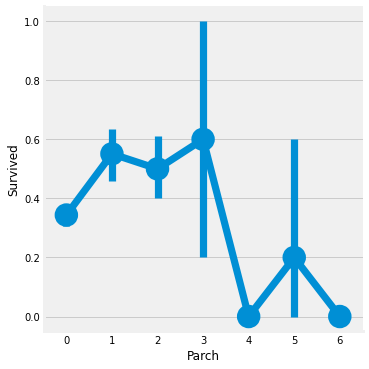

In [97]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

#plt.close(2)
plt.show()

Observations:

Parch도 SibSp와 결과가 유사하다. 부모님과 자식의 수가 많아질수록 생존률이 크게 줄어들며, 1~3명 정도가 가장 생존할 확률이 높다. 신기한 것은 혼자 탑승하였어도 생존률이 그리 높지 않다.

## Fare -> Continuous Feature

In [98]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())   # 0.0
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


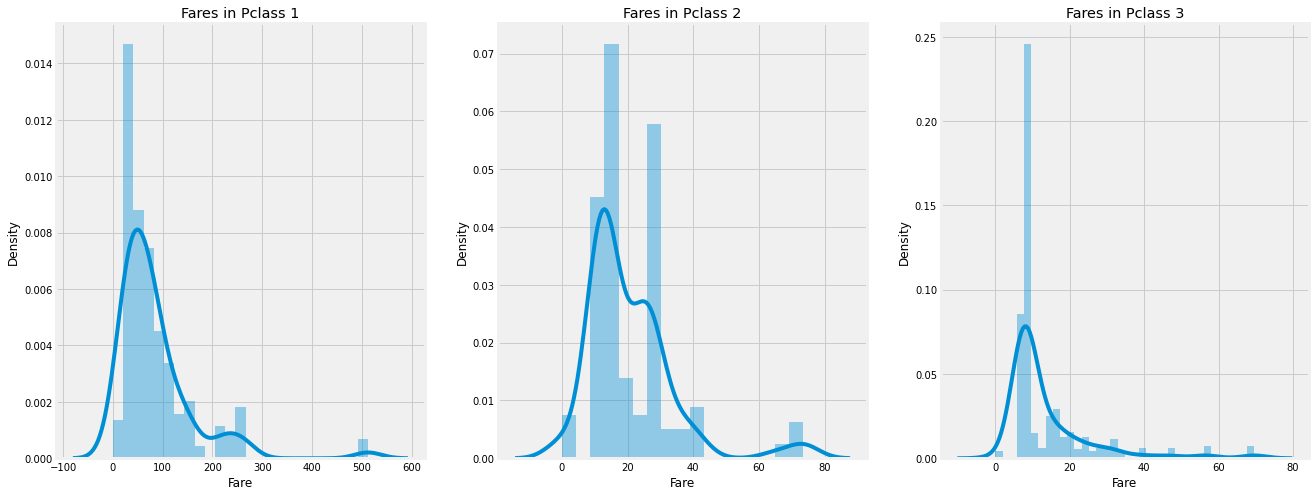

In [101]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Pclass==1의 운임 분포
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# Pclass==2의 운임 분포
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# Pclass==3의 운임 분포
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Observations in a Nutshell for all features:

**Sex:** **여성**의 생존 가능성이 남성보다 월등히 높음

**Pclass:** **1st class의 승객들**의 생존 가능성이 다른 두 class보다 높음. **3rd class**의 생존률은 매우 낮음. **Pclass1과 Pclass2에서 여성의 생존률은 거의 1에 가까움.**

**Embarked:** 대부분의 Pclass1의 승객들이 S에서 탔음에도 **C에서 탑승한 사람들의 생존률이 더 높음.** 아마 대부분의 Pclass3의 승객들도 S에서 탑승해서 그런 것 같음. C에서 탑승하는 것이 생존할 가능성이 더 높아보임. Q는 거의 다 Pclass3였음.

**SibSp + Parch:** 1\~2명의 형제자매, 또는 1\~3명의 부모 또는 자식과 같이 탑승한 승객의 생존 가능성이 높음

## Correlation Between The Features